# Conjunto de Cantor

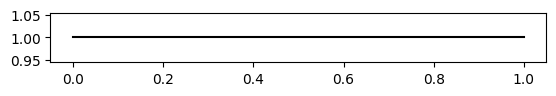

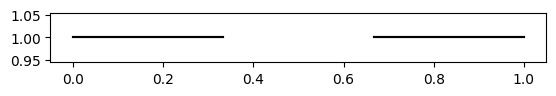

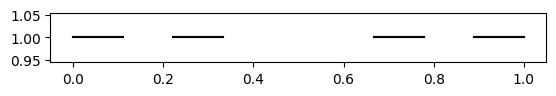

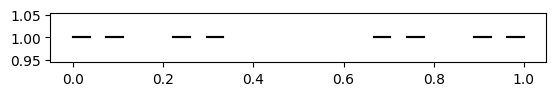

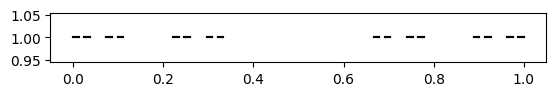

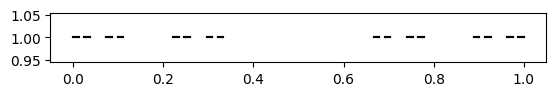

In [1]:
import matplotlib.pyplot as plt

def f1(v):
    vert=(v[1]-v[0])/3+v[0]
    return [v[0],vert]

def f2(v):
    vert=2*(v[1]-v[0])/3+v[0]
    return [vert,v[1]]

def cantor(n,v):
    if n>0:
        vIzda = f1(v)
        vDcha = f2(v)
        if n==1:
            plt.plot(vDcha,[1,1],'k')
            plt.plot(vIzda,[1,1],'k')
        cantor(n-1,vIzda)
        cantor(n-1,vDcha)
    else:
        plt.plot(v,[1,1],'k')

nIter = 4
plt.figure()

for i in range(nIter+1):
    ax = plt.subplot(111)
    ax.set_aspect(1)
    cantor(i,v=[0,1])
    plt.draw()
    plt.pause(0.5)
    plt.clf()

ax = plt.subplot(111)
ax.set_aspect(1)
cantor(nIter,v=[0,1])
plt.show()


# Triángulo de Sierpinski

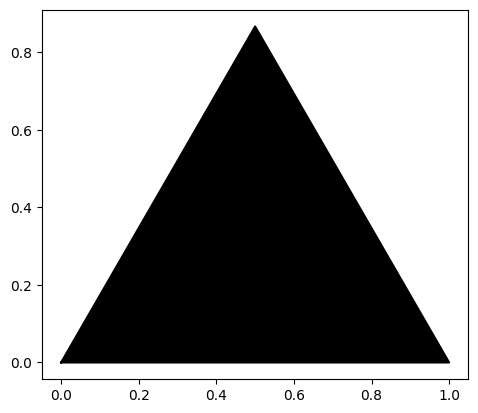

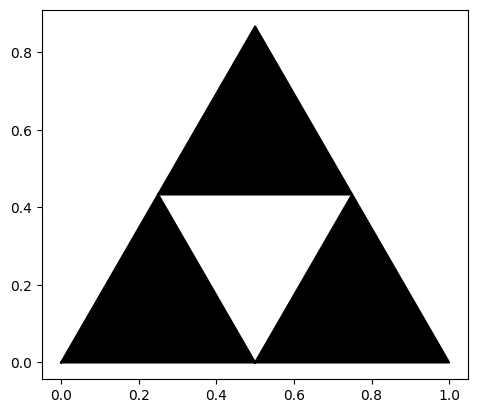

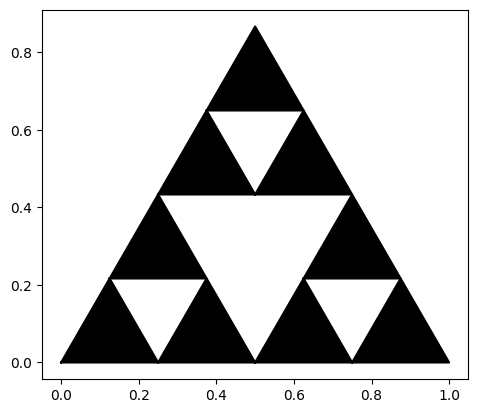

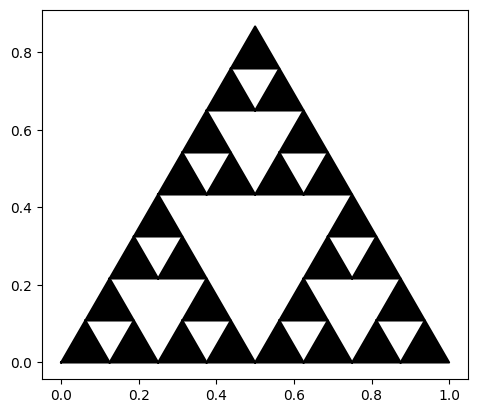

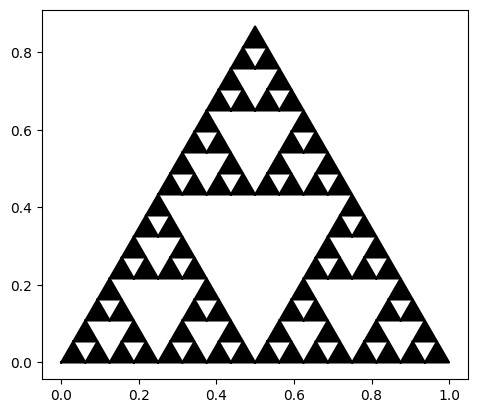

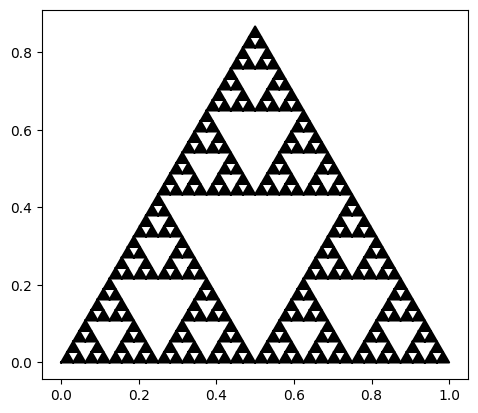

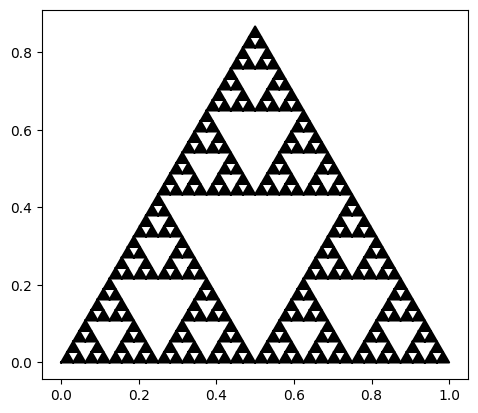

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f1(v):
    vert1=[(e2-e1)/2+e1 for e1,e2 in zip(v[0],v[1])]
    vert2=[(e2-e1)/2+e1 for e1,e2 in zip(v[0],v[2])]
    return [v[0],vert1,vert2]

def f2(v):
    vert0=[(e2-e1)/2+e1 for e1,e2 in zip(v[0],v[1])]
    vert2=[(e2-e1)/2+e1 for e1,e2 in zip(v[1],v[2])]
    return [vert0,v[1],vert2]

def f3(v):
    vert0=[(e2-e1)/2+e1 for e1,e2 in zip(v[0],v[2])]
    vert1=[(e2-e1)/2+e1 for e1,e2 in zip(v[1],v[2])]
    return [vert0,vert1,v[2]]

def sierpinski(n,v):
    if n>0:
        t1 = f1(v)
        t2 = f2(v)
        t3 = f3(v)
        sierpinski(n-1,t1)
        sierpinski(n-1,t2)
        sierpinski(n-1,t3)
    else:
        v.append(v[0])
        xs,ys = zip(*v)
        plt.plot(xs,ys,'k')
        plt.fill(xs,ys,'k')

nIter = 5
plt.figure()

for i in range(nIter+1):
    ax = plt.subplot(111)
    ax.set_aspect(1)
    sierpinski(i,v=[[0,0],[1,0],[1/2,np.sqrt(3)/2]])
    plt.draw()
    plt.pause(0.5)
    plt.clf()

ax = plt.subplot(111)
ax.set_aspect(1)
sierpinski(nIter,v=[[0,0],[1,0],[1/2,np.sqrt(3)/2]])
plt.show()


# Triángulo de Sierpinski aleatorio

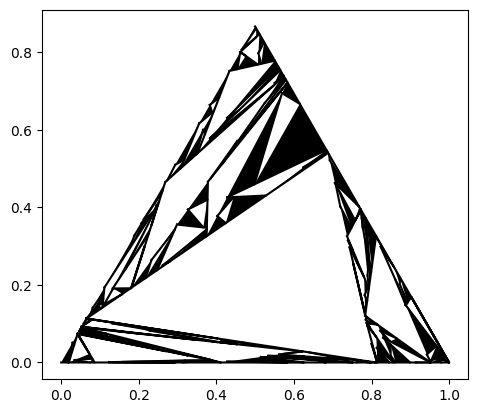

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

def f1(v):
    aux = random.uniform(0,1)
    vert1 = (v[1]-v[0])*aux+v[0]
    aux = random.uniform(0,1)
    vert2 = (v[2]-v[0])*aux+v[0]
    return np.array([v[0],vert1,vert2])

def f2(v,t):
    aux = random.uniform(0,1)
    vert2 = (v[2]-v[1])*aux+v[1]
    return np.array([t[1],v[1],vert2])

def f3(v,t1,t2):
    return np.array([t1[2],t2[2],v[2]])

def sierpinski(n,v):
    if n>0:
        t1 = f1(v)
        t2 = f2(v,t1)
        t3 = f3(v,t1,t2)
        sierpinski(n-1,t1)
        sierpinski(n-1,t2)
        sierpinski(n-1,t3)
    else:
        np.append(v,v[0])
        xs,ys = zip(*v)
        plt.plot(xs,ys,'k')
        plt.fill(xs,ys,'k')

nIter = 5
plt.figure()

ax = plt.subplot(111)
ax.set_aspect(1)
sierpinski(nIter,np.array([[0,0],[1,0],[1/2,np.sqrt(3)/2]]))
plt.show()


# Curva de Koch

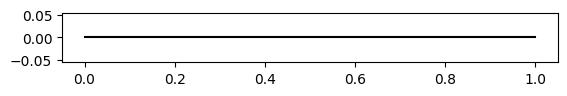

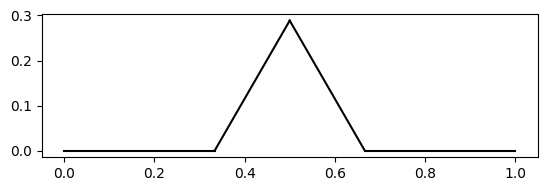

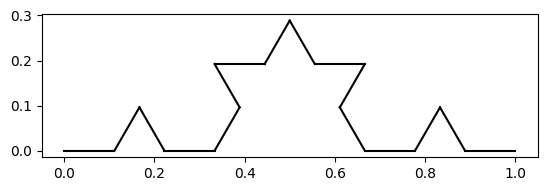

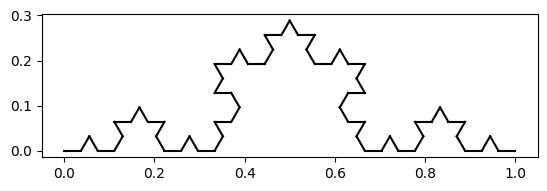

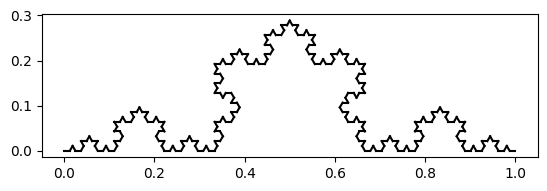

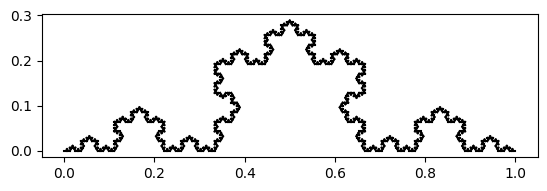

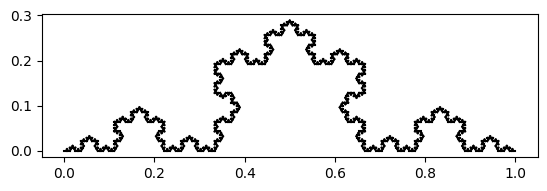

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def koch(p1, p2, n):
    if n>0:
        p3 = p1 + (p2 - p1) / 3
        p5 = p2 - (p2 - p1) / 3
        v = p5 - p3
        R = np.array([[0.5, -np.sqrt(3)/2], [np.sqrt(3)/2, 0.5]]) # Matriz de rotacion 60º sentido antihorario
        p4 = p3 + np.dot(R, v)
        koch(p1, p3, n-1)
        koch(p3, p4, n-1)
        koch(p4, p5, n-1)
        koch(p5, p2, n-1)
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]],'k')

nIter = 5
plt.figure()

for i in range(nIter+1):
    ax = plt.subplot(111)
    ax.set_aspect(1)
    koch(np.array([0,0]), np.array([1,0]), i)
    plt.draw()
    plt.pause(0.5)
    plt.clf()

ax = plt.subplot(111)
ax.set_aspect(1)
koch(np.array([0,0]), np.array([1,0]), nIter)
plt.show()


# Curva de Koch aleatoria

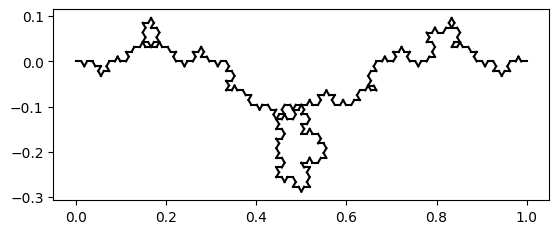

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

def koch(p1, p2, n):
    if n == 0:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]],'k')
    else:
        p3 = p1 + (p2 - p1) / 3
        p5 = p2 - (p2 - p1) / 3
        v = p5 - p3
        aux = random.randint(1,2)
        if(aux == 1):
            R = np.array([[0.5, -np.sqrt(3)/2], [np.sqrt(3)/2, 0.5]]) # Matriz de rotacion 60º sentido antihorario
        else:
            R = np.array([[0.5, np.sqrt(3)/2], [-np.sqrt(3)/2, 0.5]]) # Matriz de rotacion 60º sentido horario
        p4 = p3 + np.dot(R, v)
        koch(p1, p3, n-1)
        koch(p3, p4, n-1)
        koch(p4, p5, n-1)
        koch(p5, p2, n-1)

nIter = 4
plt.figure()
ax = plt.subplot(111)
ax.set_aspect(1)

koch(np.array([0,0]), np.array([1,0]), nIter)
plt.show()

# Juego del Caos

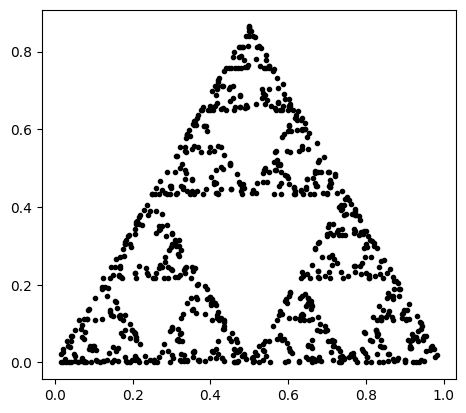

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

def caos(n,p):
    if n>0:
        t=[[0,0],[1,0],[1/2,np.sqrt(3)/2]]
        dado = random.randint(1,6)
        if dado==1 or dado==2:
            pAux=[(e2+e1)/2 for e1,e2 in zip(t[0],p)]
        elif dado==3 or dado==4:
            pAux=[(e2+e1)/2 for e1,e2 in zip(t[1],p)]
        else:
            pAux=[(e2+e1)/2 for e1,e2 in zip(t[2],p)]
        plt.plot(pAux[0],pAux[1],marker='.',color='k')
        caos(n-1,pAux)
    else:
        plt.plot(p[0],p[1],marker='.',color='k')

plt.figure()
ax = plt.subplot(111)
ax.set_aspect(1)

caos(900,p=[0,0])

plt.show()


# Dragón de Heighway

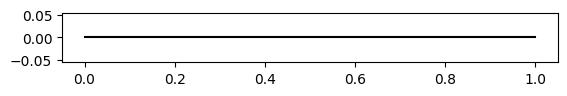

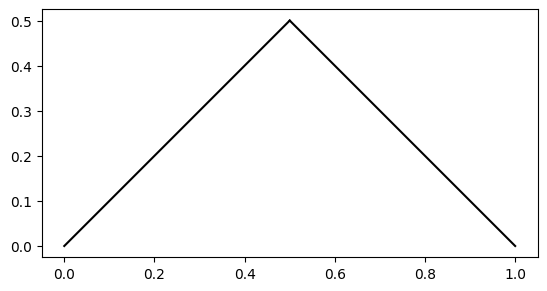

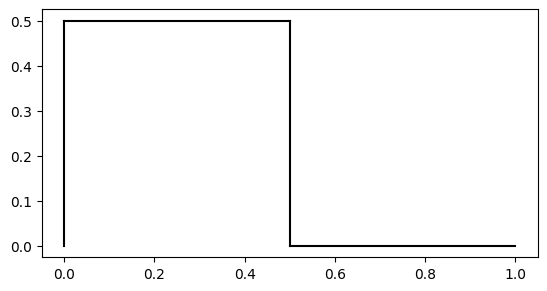

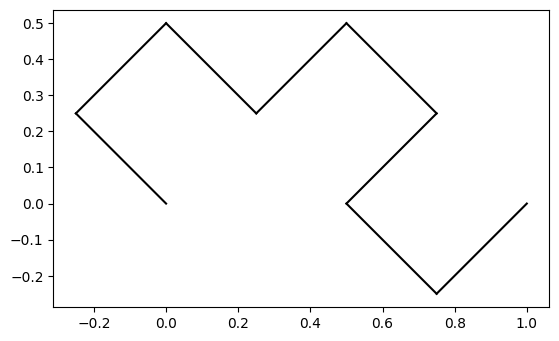

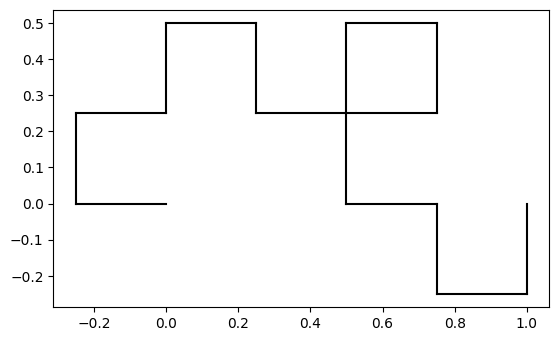

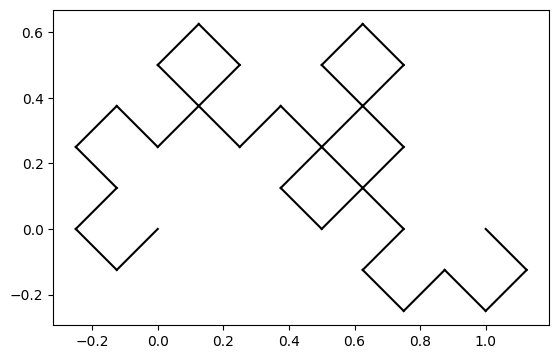

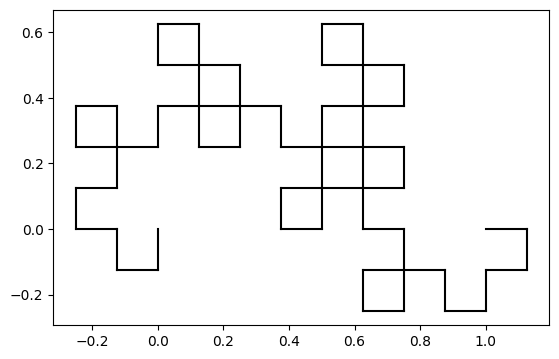

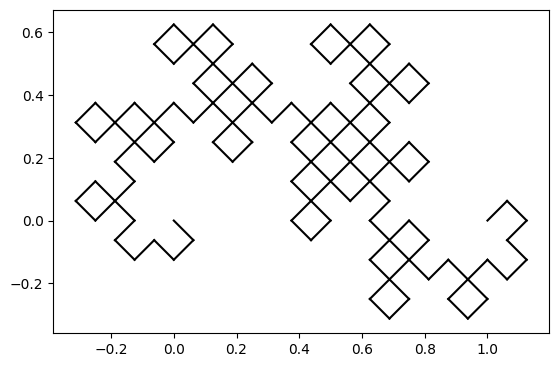

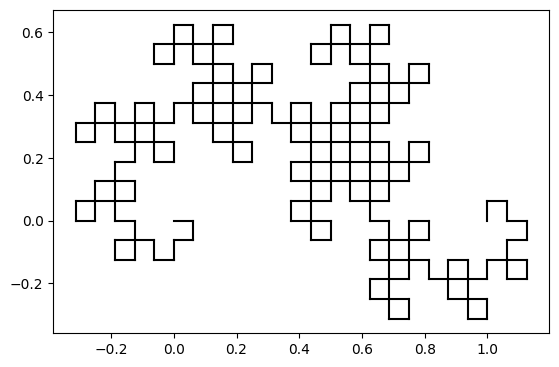

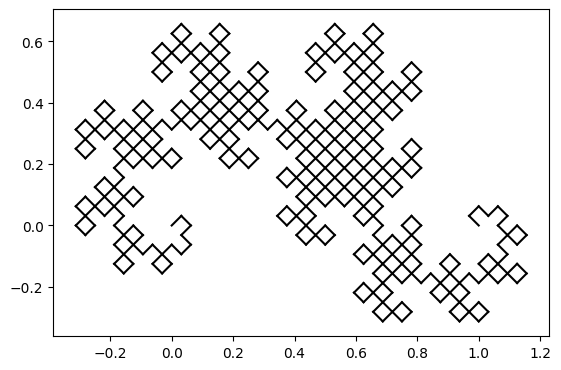

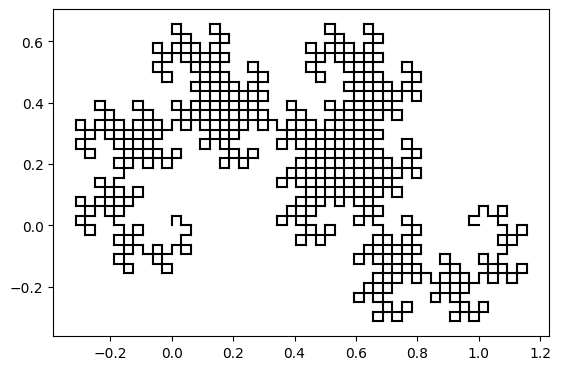

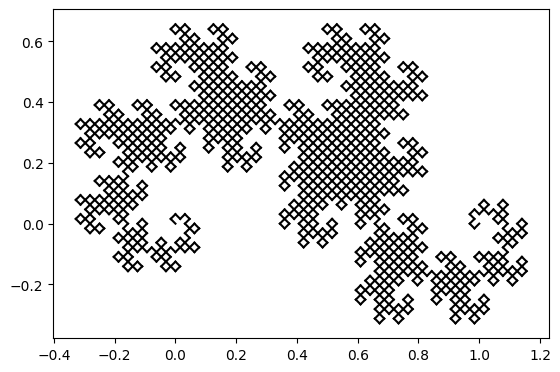

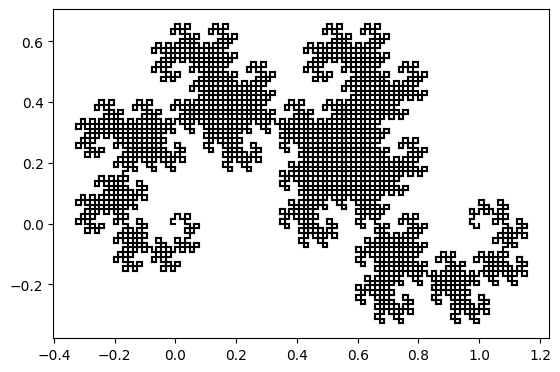

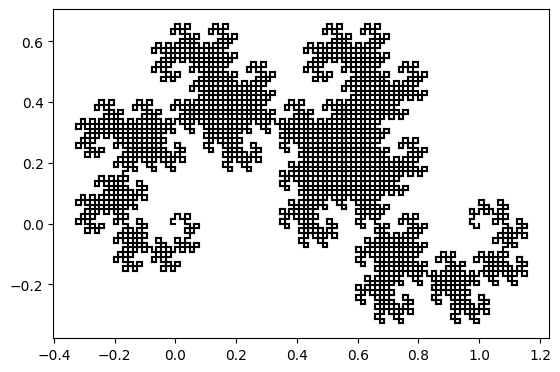

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def dragon(p1, p2, n):
    if n>0:
        p3 = p1 + (p2 - p1)/2
        v = p3 - p1
        S = np.array([[np.sqrt(2),0],[0,np.sqrt(2)]]) # Matriz de escalado razon sqrt(2)/2
        R = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2], [np.sqrt(2)/2, np.sqrt(2)/2]]) # Matriz de rotacion 45º
        p4 = p1 + np.dot(S,np.dot(R,v))
        dragon(p1,p4,n-1)
        dragon(p2,p4,n-1)
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]],'k')

nIter = 12
plt.figure()

for i in range(nIter+1):
    ax = plt.subplot(111)
    ax.set_aspect(1)
    dragon(np.array([0,0]), np.array([1,0]), i)
    plt.draw()
    plt.pause(0.5)
    plt.clf()

ax = plt.subplot(111)
ax.set_aspect(1)
dragon(np.array([0,0]), np.array([1,0]), nIter)
plt.show()

# Movimiento Browniano fraccionario

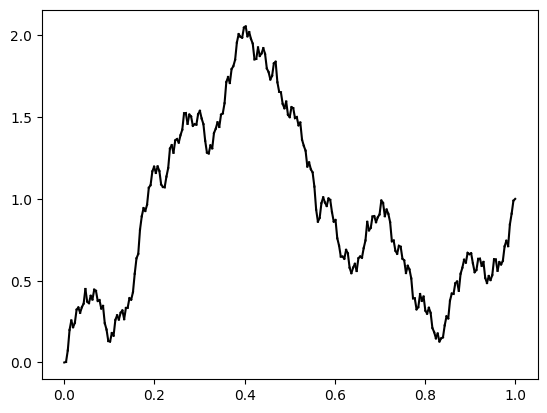

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random

def browniano(p1,p2,n,H,cont):
    if n>0:
        pM = (p2-p1)/2+p1
        aux = random.randint(1,2)
        if aux==1:
            pMal = np.array([pM[0],pM[1]+1/(2**H)**cont])
        else:
            pMal = np.array([pM[0],pM[1]-1/(2**H)**cont])
        browniano(p1,pMal,n-1,H,cont+1)
        browniano(pMal,p2,n-1,H,cont+1)
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]],'k')

nIter = 8
H = 0.7 # 0.5 = mov browniano clasico
plt.figure()

browniano(np.array([0,0]), np.array([1,1]), nIter, H, cont=0)
plt.show()
